In [1]:
from data_process import process
import pandas as pd

In [2]:
import os

folder_path = 'asset_data'
dataframes = {} 

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.xls', '.xlsx')):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_excel(file_path)

            if filename.startswith('choice_'):
                name = filename[7:].rsplit('.', 1)[0]  
                df = process.choice_process(df)
                dataframes[f'{name}'] = df

            elif filename.startswith('wind_'):
                name = filename[5:].rsplit('.', 1)[0] 
                df = process.wind_process(df)
                dataframes[f'{name}'] = df

        except Exception as e:
            print(f"读取文件 {filename} 时出错: {e}")


In [3]:
dataframes

{'上证指数':               price
 date               
 1990-12-19    99.98
 1990-12-20   104.39
 1990-12-21   109.13
 1990-12-24   114.55
 1990-12-25   120.25
 ...             ...
 2025-01-16  3236.03
 2025-01-17  3241.82
 2025-01-20  3244.38
 2025-01-21  3242.62
 2025-01-22  3213.62
 
 [8327 rows x 1 columns],
 '原油':             price
 date             
 1986-09-04  16.21
 1986-09-05  16.37
 1986-09-08  15.62
 1986-09-09  15.27
 1986-09-10  14.88
 ...           ...
 2025-07-23  65.42
 2025-07-24  66.16
 2025-07-25  65.07
 2025-07-28  66.98
 2025-07-29  67.07
 
 [9825 rows x 1 columns],
 '德国DAX':                price
 date                
 1991-07-01   1628.75
 1991-07-02   1613.63
 1991-07-03   1606.51
 1991-07-04   1621.04
 1991-07-05   1618.16
 ...              ...
 2025-01-16  20655.39
 2025-01-17  20903.39
 2025-01-20  20990.31
 2025-01-21  21042.00
 2025-01-22  21318.75
 
 [8498 rows x 1 columns],
 '日经225':                price
 date                
 1949-05-16    176.21
 1949-05-17 

In [4]:
from functools import reduce


renamed_dfs = [df.rename(columns={'price': name}) for name, df in dataframes.items()]

merged_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='inner'), renamed_dfs)


In [5]:
merged_df

,上证指数,原油,德国DAX,日经225,标普500,黄金,南华商品指数,国债财富指数
date,,,,,,,,
2004-06-01,1579.66,42.33,3864.18,11296.76,1121.20,395.5,1000.00,100.99
2004-06-02,1567.07,39.96,3888.31,11242.34,1124.99,392.5,1010.57,100.66
2004-06-03,1543.53,39.28,3917.08,11027.05,1116.64,388.9,992.78,101.41
2004-06-04,1542.09,38.49,3961.93,11128.05,1122.50,390.9,990.27,101.10
2004-06-07,1517.15,38.66,4017.81,11439.92,1140.42,394.5,996.31,100.46
...,...,...,...,...,...,...,...,...
2025-01-14,3240.94,76.89,20271.33,38474.30,5842.91,2693.1,2554.61,246.46
2025-01-15,3227.12,79.16,20574.68,38444.58,5949.91,2722.6,2564.61,246.72
2025-01-16,3236.03,77.91,20655.39,38572.60,5937.34,2746.9,2586.22,246.60


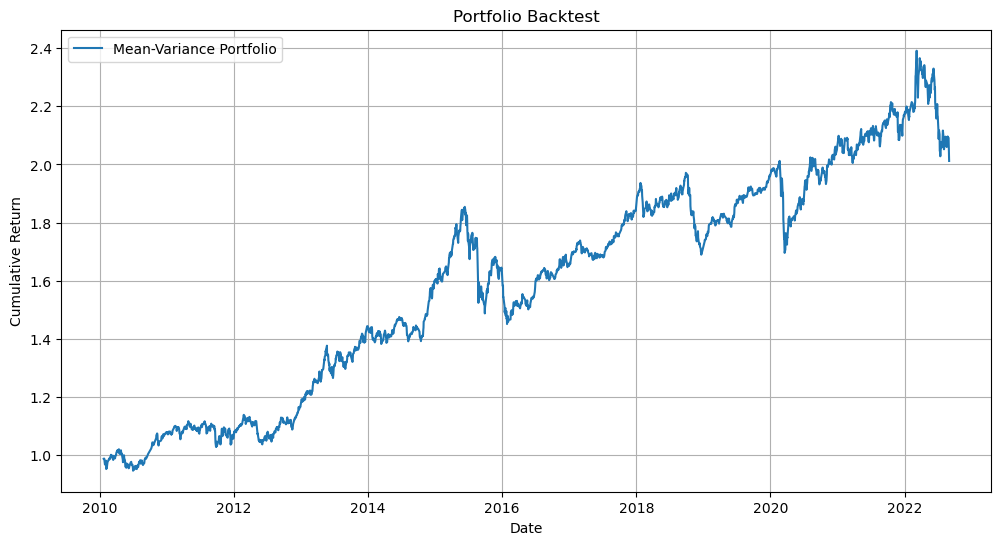

Latest portfolio weights:
{'上证指数': 2.525757381022231e-15, '原油': 0.24999999999999167, '德国DAX': 3.913536161803677e-15, '日经225': 0.25, '标普500': 2.0261570199409107e-15, '黄金': 3.3029134982598407e-15, '南华商品指数': 0.24999999999999745, '国债财富指数': 0.2499999999999988}


In [6]:
import importlib
import src.backtester
importlib.reload(src.backtester)

from src.backtester import Backtester
import matplotlib.pyplot as plt



if __name__ == "__main__":
    prices = merged_df.iloc[1000:4000, :].copy()

    # 使用均值方差模型进行回测
    backtester = Backtester(
        prices, 
        optimizer_type="mean_variance", 
        window=252,
        risk_free_rate=0.0
    )
    
    portfolio_index, weights_history = backtester.run()

    # 绘图
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_index, label="Mean-Variance Portfolio")
    plt.title("Portfolio Backtest")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 输出最新权重
    print("Latest portfolio weights:")
    print(dict(zip(prices.columns, weights_history[-1])))